# FLIP ROBO TECHNOLOGIES

# NAME: BIJAY PAREEK

# BATCH: DS2308


# Projects Evaluation Phase 1:

# HR Analytics Project- Understanding the Attrition in HR

# Project Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.


# Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


Dataset Link-
•	https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics



# import necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# loading the dataset:

In [2]:
df = pd.read_csv(r"C:/Users/raj/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
print("The dataset contains rows and columns are as follows = ",df.shape)

The dataset contains rows and columns are as follows =  (1470, 35)


# now we will see the total columns name present in the dataset :

In [4]:
print("The columns name of dataset are as below--------",df.columns)

The columns name of dataset are as below-------- Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


# checking for the nan value:

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Note: I can see in the dataset that there is no nan present we can go further for analysis

# [EDA AND VISUALISATION]:

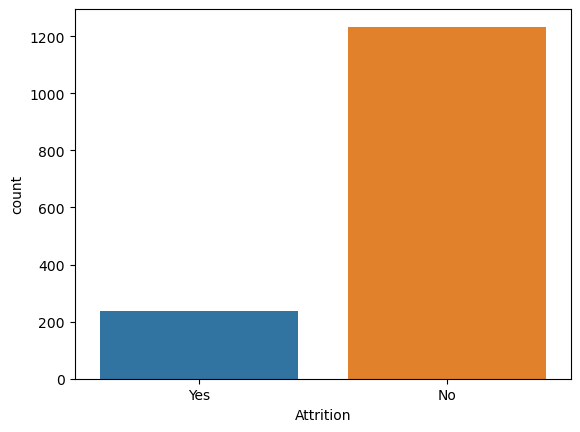

In [6]:
sns.countplot(df["Attrition"])
plt.show()


## observation

## There are 237 attrition
## and 1233 --> No attrition

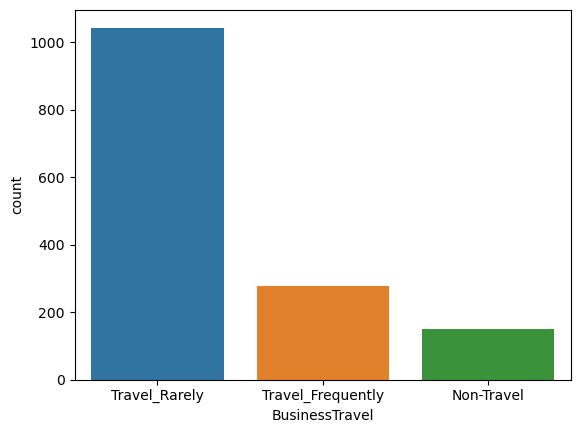

In [7]:
sns.countplot(df["BusinessTravel"])
plt.show()


## observation:

## Travel_Rarely=1043

## Travel_Frequently=277

## Non-Travel=150

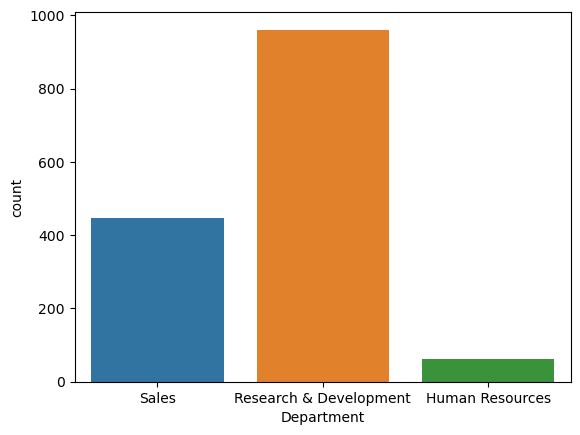

In [8]:
sns.countplot(df["Department"])
plt.show()


## observation:

## Research & Development=961

## Sales=446

## Human Resources=63

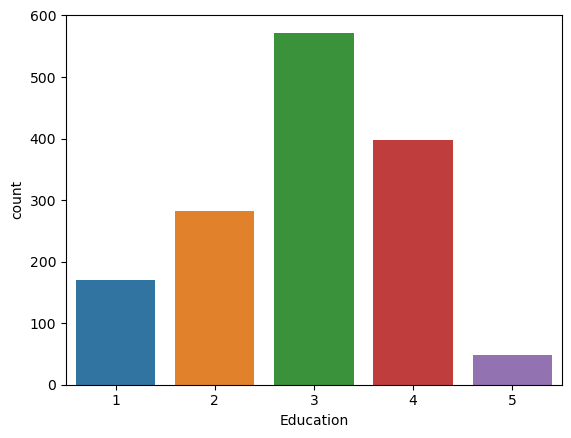

In [9]:
sns.countplot(df["Education"])
plt.show()


# observation:

## Education class 1---->170

## Education class 2---->282

## Education class 3---->572

## Education class 4---->398

## Education class 5---->48

# now we see the total no of males and female present in the dataset:

In [10]:
df["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

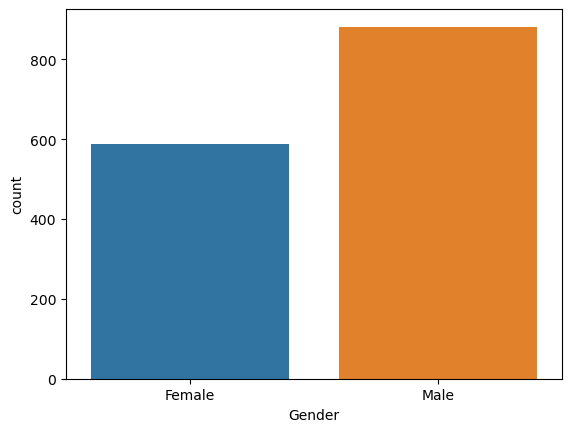

In [11]:
sns.countplot(df["Gender"])
plt.show()


# observation:

## Male=882

## Female=588

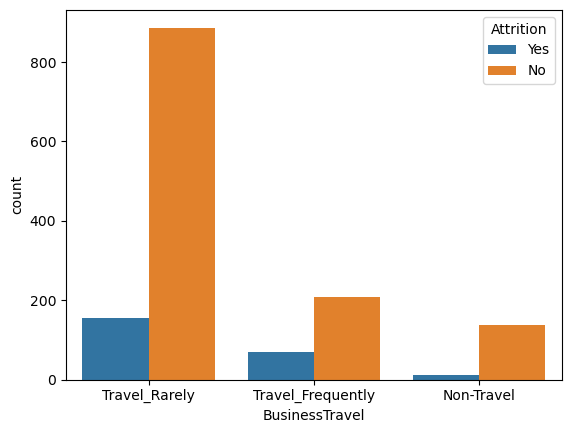

In [12]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)
plt.show()


# observation:

## people who "Travel Rarely" have more attrition rate as compared to others.

## The attrition rate for "Non-Travel" is the least

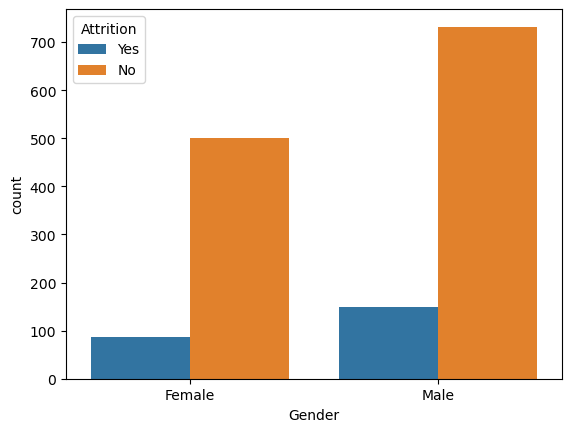

In [13]:
sns.countplot(x='Gender',hue='Attrition',data=df)
plt.show()


# observation

## among all the people most of the males had faced attrition as compared to females

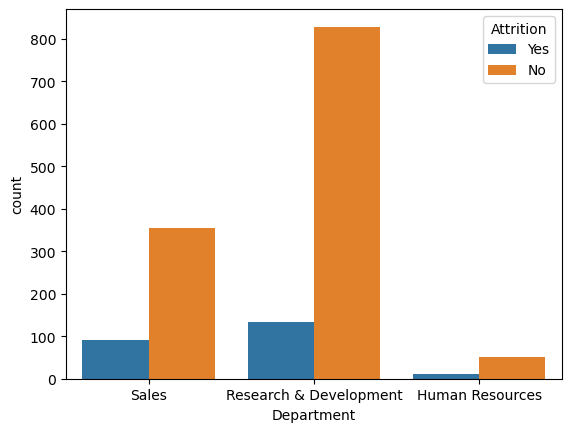

In [14]:
sns.countplot(x='Department',hue='Attrition',data=df)
plt.show()


# observation:

## The R&D department faced most attrition while employees in HR department had lower attrition

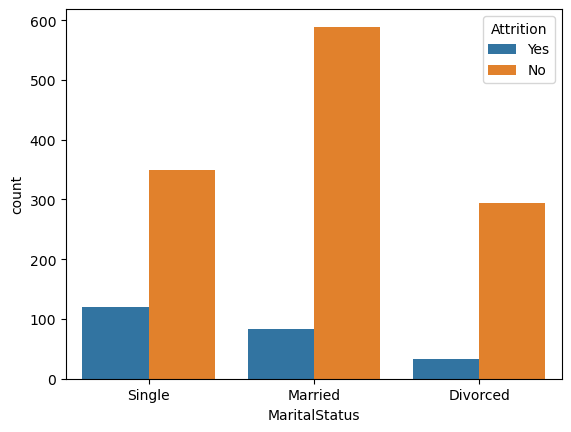

In [15]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)
plt.show()


# observation:
## single employees had a trend of attrition

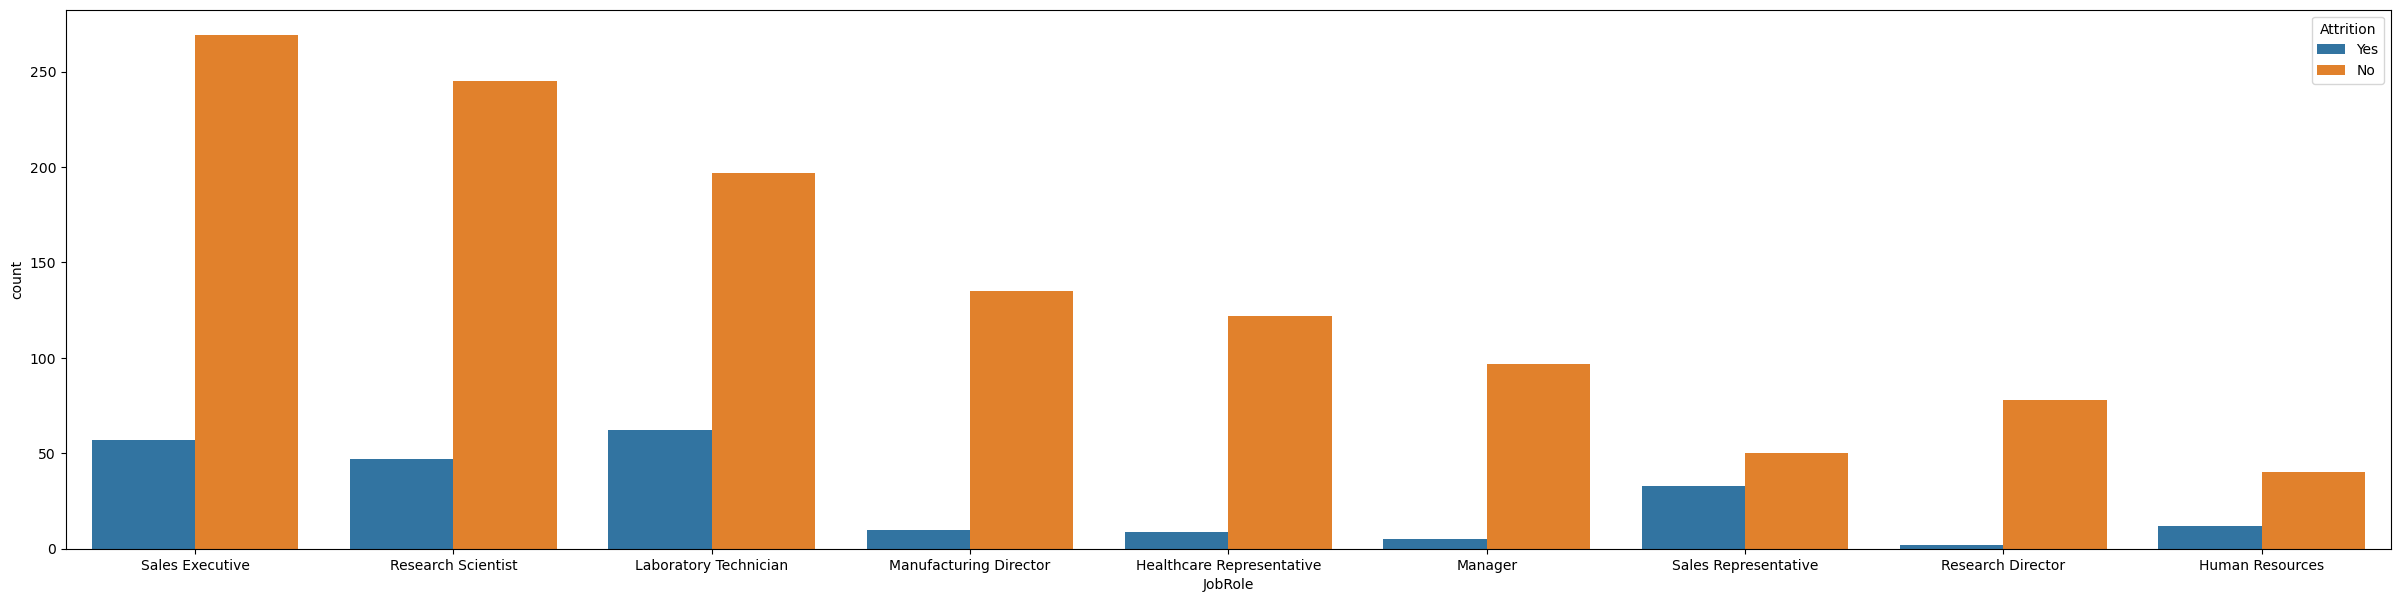

In [16]:
plt.figure(figsize=(30,7))
sns.countplot(x='JobRole',hue='Attrition',data=df)
plt.show()


## observation:

## employees who were Laboratory technician and Sales Executive had a high attrition rate

## Research Directors had the least attrition

# Now we use the distribution plot of all numerical value present in the dataset:

In [17]:
numerical_list=['Age', 'DailyRate', 
       'DistanceFromHome', 'Education','EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction','HourlyRate',
       'JobInvolvement', 'JobLevel','JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

print("Here is the numerical_list from the dataset------------- ",numerical_list)

Here is the numerical_list from the dataset-------------  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## Now we use loop for ploting the distribution of numerical_list:

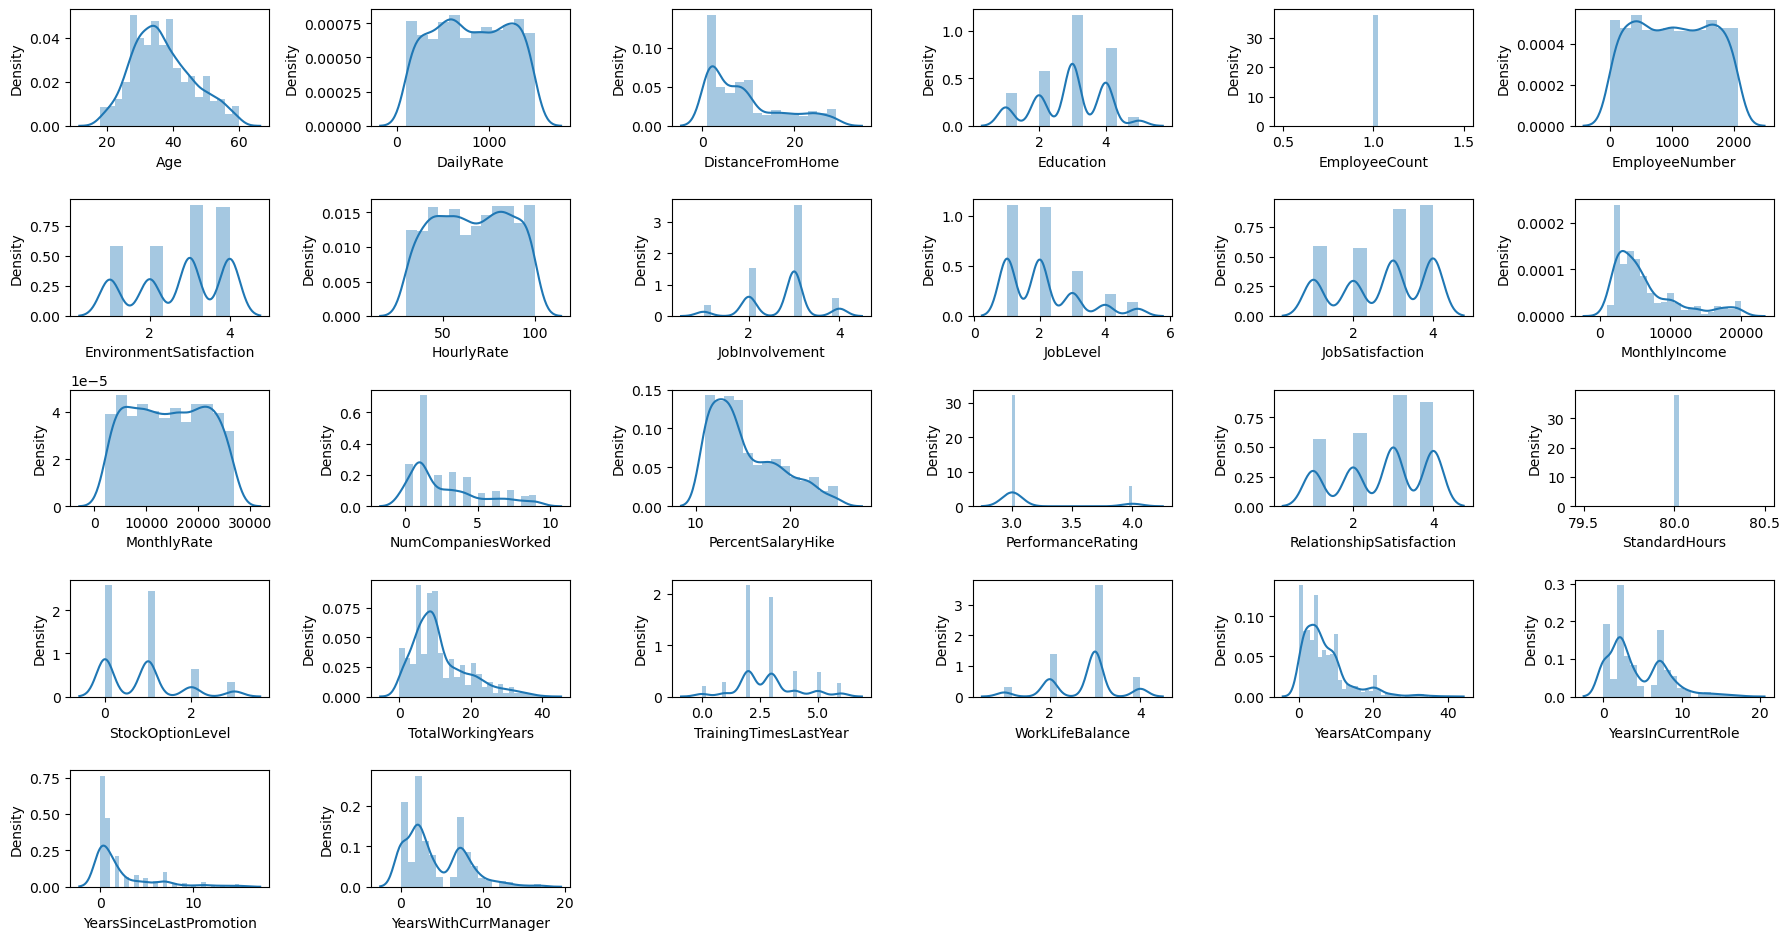

In [18]:
ncol=6
nrow=16
plt.figure(figsize=(3*ncol,5*ncol))

for i in range(0,len(numerical_list)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[numerical_list[i]])
    plt.tight_layout()

# now we see the correlation  among the dataset:

In [19]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


## Note: the standard hours,employee count,employee number do not have any correlation to the target variable let us drop them from the dataset

In [20]:
df.drop(["EmployeeCount","EmployeeNumber","StandardHours"],axis=1,inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


# [Label Encoder]:

In [21]:
le = LabelEncoder()

code = ["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","Over18","OverTime"]

for i in code:
    le.fit(df[i])
    df[i]=le.fit_transform(df[i])

In [22]:
df[i]

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int32

# [Standard scaling]:

In [23]:
print("Here we kept the x(feature) and y(label) from the main dataset-----------------------------")

Here we kept the x(feature) and y(label) from the main dataset-----------------------------


In [24]:
x=df.drop(["Attrition"],axis=1) 
y=df["Attrition"]

In [25]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [26]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [27]:
sc = StandardScaler()

x=sc.fit_transform(x)

In [28]:
print('Here we can see the scaled data--------',x)

Here we can see the scaled data-------- [[ 0.4463504   0.59004834  0.74252653 ... -0.0632959  -0.67914568
   0.24583399]
 [ 1.32236521 -0.91319439 -1.2977746  ...  0.76499762 -0.36871529
   0.80654148]
 [ 0.008343    0.59004834  1.41436324 ... -1.16768726 -0.67914568
  -1.15593471]
 ...
 [-1.08667552  0.59004834 -1.60518328 ... -0.61549158 -0.67914568
  -0.31487349]
 [ 1.32236521 -0.91319439  0.54667746 ...  0.48889978 -0.67914568
   1.08689522]
 [-0.32016256  0.59004834 -0.43256792 ... -0.33939374 -0.36871529
  -0.59522723]]


# Now we will use the train_test_split:

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=98)

# Now we use the differnt model and select the best model:

In [30]:
models = [LogisticRegression(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          SVC()]

print("Here are the model---------------",models)

Here are the model--------------- [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), SVC()]


## now we use the loop for evalute the model:

In [31]:
for i in models:
    i.fit(x_train,y_train)
    pred_y=i.predict(x_test)
    print("The result ",i,"model")
    print(f" The accuracy score is =  {accuracy_score(y_test,pred_y)*100}")
    crossval=cross_val_score(i,x,y,cv=5).mean()*100
    print("The cross_validation score is =",crossval)
    print('\n')

The result  LogisticRegression() model
 The accuracy score is =  96.66666666666667
The cross_validation score is = 86.5986394557823


The result  DecisionTreeClassifier() model
 The accuracy score is =  80.0
The cross_validation score is = 78.91156462585033


The result  KNeighborsClassifier() model
 The accuracy score is =  100.0
The cross_validation score is = 85.03401360544217


The result  SVC() model
 The accuracy score is =  100.0
The cross_validation score is = 86.3265306122449




# Hyper parameter tuning for logistic regression:

In [32]:
parameters={'penalty':['l2','elasticnet','none'],"class_weight":["dict","balanced"],
            "multi_class":['auto','ovr', 'multinomial'],"max_iter":[100,200,300]}

print('Here is the parameters-----',parameters)

Here is the parameters----- {'penalty': ['l2', 'elasticnet', 'none'], 'class_weight': ['dict', 'balanced'], 'multi_class': ['auto', 'ovr', 'multinomial'], 'max_iter': [100, 200, 300]}


In [33]:
lr = LogisticRegression()
print("Here we called the model-------",lr)

Here we called the model------- LogisticRegression()


In [34]:
gs=GridSearchCV(lr,parameters)
gs.fit(x_train,y_train)
print(gs.best_params_)

{'class_weight': 'dict', 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2'}


In [35]:
Lr=LogisticRegression(class_weight='dict',max_iter=100,multi_class="auto",penalty="none")
Lr.fit(x_train,y_train)

LogisticRegression(class_weight='dict', penalty='none')

In [36]:
y_pred=Lr.predict(x_test)

In [37]:
acc=accuracy_score(y_test,pred_y)*100
print("The accuracy result is =",acc)
cross=cross_val_score(lr,x,y,cv=5).mean()*100
print("The cross_validation score is = ",cross)
print("\n")
print("The confusion matrix is = ",confusion_matrix(y_test,pred_y))

print("The classification report is = ",classification_report(y_test,pred_y))

The accuracy result is = 100.0
The cross_validation score is =  86.5986394557823


The confusion matrix is =  [[29  0]
 [ 0  1]]
The classification report is =                precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00         1

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [38]:
actual=np.array(y_test)
predicted=np.array(Lr.predict(x_test))

In [39]:
actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

# Now we will compare the actual and predict:

In [41]:
print("Here is the comparing result of actuial and predict data------")

df_comparing=pd.DataFrame({"actual":actual,"predicted":predicted})
df_comparing

Here is the comparing result of actuial and predict data------


,actual,predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


# [conclusion]

# observation:

## I have trained and tested my model using Logistic Regression .

## The actual and predicted values yeild the same values.

## The model is 100% accurate

# saving the best model:

In [43]:
import pickle
filename="HR_attrition.pkl"
pickle.dump(Lr,open(filename,"wb"))

In [42]:
######################################################## thank you###########################################################